# Pandas Continuation

### Load basic libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import re
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('max_columns', 15)
pd.set_option('chained_assignment', None)

### Load data from a csv or zip file


In [2]:
# Data reference
filename = "./data/abcnews-headlines.zip"

In [3]:
# Load the model into a dataframe 'df'
df = pd.read_csv(filename)

### Basic data inspection

In [4]:
# Get total size of the Dataset
df.shape

(1186018, 2)

In [5]:
df.head(3)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit


In [6]:
# Get some statistics: types, first rows, last rows, etc
print(f"Dataframe types:\n{df.dtypes}\n")
df.describe()

Dataframe types:
publish_date      int64
headline_text    object
dtype: object



,publish_date
count,1.186018e+06
mean,2.010563e+07
std,4.480799e+04
min,2.003022e+07
25%,2.007041e+07
50%,2.011021e+07
75%,2.014072e+07
max,2.019123e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186018 entries, 0 to 1186017
Data columns (total 2 columns):
publish_date     1186018 non-null int64
headline_text    1186018 non-null object
dtypes: int64(1), object(1)
memory usage: 18.1+ MB


Note that publish_date should be datetime and not an integer.

Lets solve that and create some extra features.

In [8]:
pd.read_csv?

In [9]:
# Parse the publish_date and datetime

df = pd.read_csv(filename, parse_dates=['publish_date'])
df.head(2)

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation


In [10]:
import re
clean = re.compile(r'[\s,\.]')

clean.sub("", "testing, this .split")

'testingthissplit'

In [11]:
# Create count of words and letters (without spaces)
df['word_count'] = df.headline_text.apply(lambda x: len(x.split(" ")))
df['letters_count'] = df.headline_text.apply(lambda x: len(clean.sub("", x)))

In [12]:
# Show the head of the dataframe with the new fields
df.head(3)

,publish_date,headline_text,word_count,letters_count
0,2003-02-19,aba decides against community broadcasting lic...,6,45
1,2003-02-19,act fire witnesses must be aware of defamation,8,39
2,2003-02-19,a g calls for infrastructure protection summit,7,40


In [13]:
# Get statistics of the dataframe
df.describe()

,word_count,letters_count
count,1.186018e+06,1.186018e+06
mean,6.491294e+00,3.528376e+01
std,1.847492e+00,9.455919e+00
min,1.000000e+00,3.000000e+00
25%,5.000000e+00,2.900000e+01
50%,6.000000e+00,3.600000e+01
75%,8.000000e+00,4.100000e+01
max,1.500000e+01,6.700000e+01


In [14]:
# Add year, month and day into the dataframe and show the head of the modified dataframe
df['year'] = df.publish_date.apply(lambda x: x.year)
df['month'] = df.publish_date.apply(lambda x: x.month)
df['day'] = df.publish_date.apply(lambda x: x.day)
df.head(3)

,publish_date,headline_text,word_count,letters_count,year,month,day
0,2003-02-19,aba decides against community broadcasting lic...,6,45,2003,2,19
1,2003-02-19,act fire witnesses must be aware of defamation,8,39,2003,2,19
2,2003-02-19,a g calls for infrastructure protection summit,7,40,2003,2,19


In [17]:
group_count = df.groupby('year')['word_count', 'letters_count'].sum()

In [18]:
group_count.head()

,word_count,letters_count
year,,
2003,406022,2175167
2004,451799,2456984
2005,459632,2504610
2006,414368,2264289
2007,484596,2628370


In [15]:
# df.drop('year', axis=1, inplace=True)

In [19]:
group_count.tail(2)

,word_count,letters_count
year,,
2018,311963,1701193
2019,266197,1460333


In [ ]:
group_count = df.groupby(['year'])[['word_count']].count()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13923fd10>]],
      dtype=object)

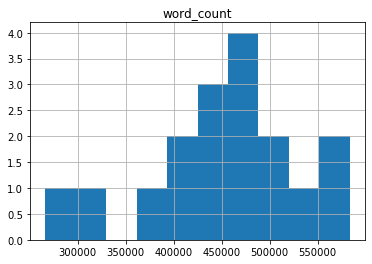

In [20]:
group_count.hist('word_count')

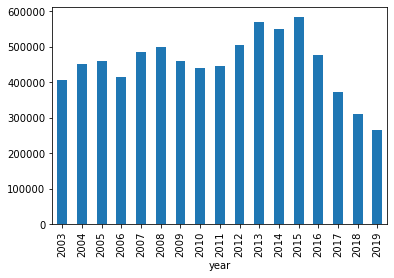

In [21]:
group_count['word_count'].plot(kind='bar')

In [22]:
group_sum_words = df.groupby(['year'])[['word_count']].sum()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d959550>]],
      dtype=object)

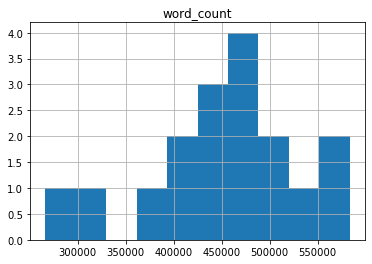

In [23]:
group_sum_words.hist('word_count')

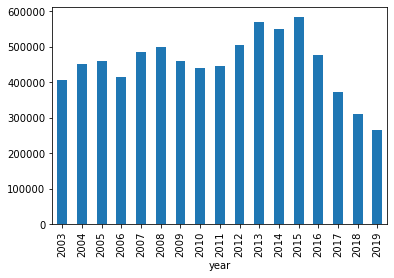

In [24]:
group_sum_words['word_count'].plot(kind='bar')

#### Plot the words and letters across time

In [25]:
# Use publish_date as the index of a new dataset called 'dfn'
dfn = df.set_index('publish_date')

In [26]:
dfn.head(3)

,headline_text,word_count,letters_count,year,month,day
publish_date,,,,,,
2003-02-19,aba decides against community broadcasting lic...,6,45,2003,2,19
2003-02-19,act fire witnesses must be aware of defamation,8,39,2003,2,19
2003-02-19,a g calls for infrastructure protection summit,7,40,2003,2,19


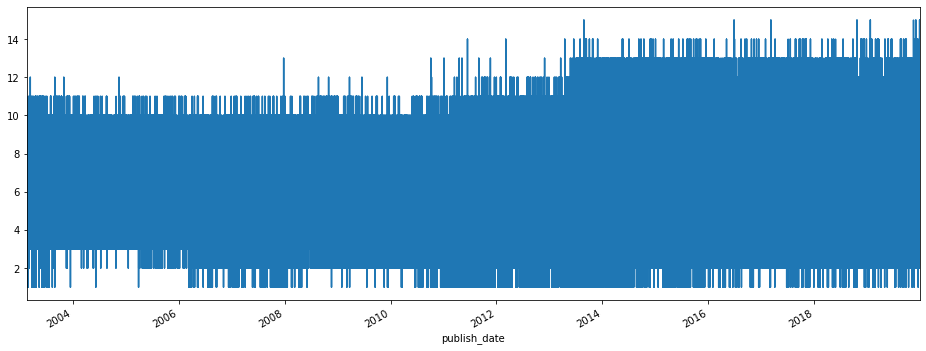

In [27]:
dfn.word_count.plot(figsize=(16, 6));

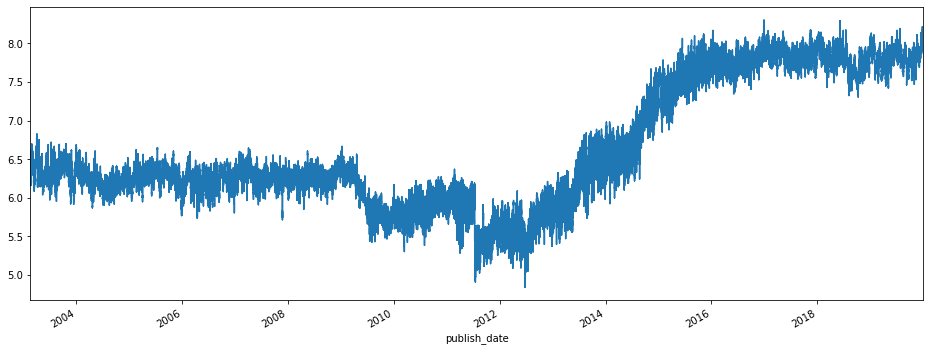

In [28]:
dfn.word_count.rolling(window=364).mean().plot(figsize=(16, 6));

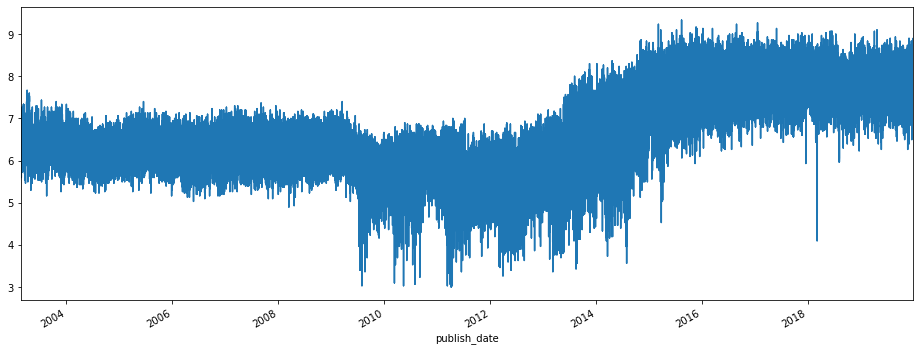

In [29]:
dfn.word_count.rolling(window=30).mean().plot(figsize=(16, 6));

In [30]:
# Create a plot of the words over time
df['has_z'] = df.headline_text.apply(lambda x: 'z' in x)

In [31]:
group_hasz_sum = df.groupby(['year'])[['has_z']].sum()
group_hasz_mean = df.groupby(['year'])[['has_z']].mean()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15607d090>]],
      dtype=object)

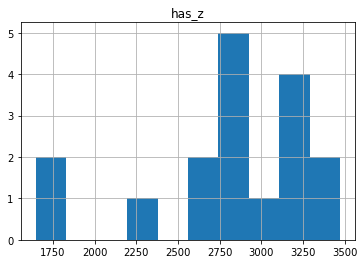

In [32]:
group_hasz_sum.hist('has_z', bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f04a950>]],
      dtype=object)

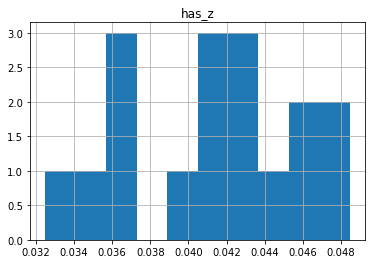

In [33]:
group_hasz_mean.hist('has_z', bins=10)

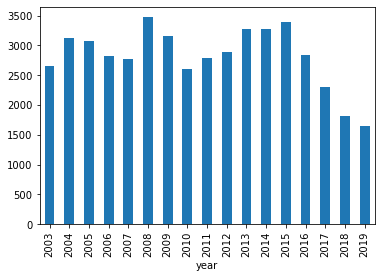

In [34]:
group_hasz_sum['has_z'].plot(kind='bar')

As this plot is not very indicative with all the noise, let's clear the noise to have in view the rolling average over a period of time.

### Faster: x10 x100 x1000

#### Read data

In [36]:
# Load data from "abcnews-headlines.zip" and parse the "publish_date"
df = pd.read_csv("data/abcnews-headlines.zip", parse_dates=["publish_date"])

#### Data inspection

In [37]:
# Inspect the data
df.head(3)

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit


#### Vectorizing a function

This is an example function to searcha for some specific string

In [38]:
def search(row, term="police", column="headline_text"):
    if term in row[column]:
        return row[column]
    else:
        return ""

In [39]:
# Create a subset of df with just a quarter of the data
df_subset = df.sample(frac=0.25)

In [41]:
df.head()

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


In [40]:
df_subset.head()

,publish_date,headline_text
1082975,2017-05-23,home school students head to international leg...
1182383,2019-11-18,muslim women enduring most islamophobia in aus...
1051146,2016-10-04,trump foundation ordered to stop fundraising i...
925526,2015-01-01,injury forces nick kyrgios out of hopman cup
946106,2015-04-21,illicit drugs north south factions cause of pr...


In [43]:
%%timeit
# apply  the function over the subset
df_subset.apply(search, axis=1)

4.55 s ± 99.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [44]:
# Store the output
test = df_subset.apply(search, axis=1)

#### Apply   numpy.where

In [24]:
term = "police"
column="headline_text"

In [47]:
%%timeit
# Now repeat for the full dataset using directly numpy
# Pandas Series Vectorized oh yea!!
idx = df['headline_text'].str.contains('police').values

np.where(idx, df['headline_text'], "")

490 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
print(f"np.where is {round((14.5 * 1000) / 36.9, 1)}x faster than .apply")

np.where is 393.0x faster than .apply


#### numpy to the rescue

Let's access numpy directly to check if we get even faster...